<a href="https://colab.research.google.com/github/anshupandey/natural_language_processing/blob/master/Multi_Label_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi Label Image Classification

In [0]:
!wget -q http://pjreddie.com/media/files/VOCtrainval_06-Nov-2007.tar

In [0]:
!tar -xvf VOCtrainval_06-Nov-2007.tar > /dev/null; echo " done."

 done.


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import models,layers
from tensorflow.keras.applications import resnet50
from tensorflow.keras.preprocessing import image

In [0]:
df = pd.read_pickle(r"multi.csv")
df.head()

,fn,cat_id
0,000012.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ..."
1,000017.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,000023.jpg,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,000026.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ..."
4,000032.jpg,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [0]:
df.cat_id[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)

In [0]:
import os

In [0]:
main_folder = "/content/VOCdevkit/VOC2007/JPEGImages"

In [0]:
x = []
y = []

for i in range(df.shape[0]):
  path = main_folder+"/"+df.fn[i]
  img = image.load_img(path,target_size=(200,200))
  img = image.img_to_array(img)
  img = resnet50.preprocess_input(img)
  x.append(img)
  y.append(df.cat_id[i])


In [0]:
x = np.array(x)
y = np.array(y)
print(x.shape)
print(y.shape)

(2501, 200, 200, 3)
(2501, 20)


In [0]:
input_layer = layers.Input(shape=(200,200,3))
model = resnet50.ResNet50(include_top=False,weights='imagenet',input_tensor=input_layer)


In [0]:
for layer in model.layers[:-2]:
  layer.trainable=False

In [0]:
out = model.layers[-1].output

k = layers.Flatten()(out)
k = layers.Dense(512,activation='relu')(k)
k = layers.Dropout(0.2)(k)
k = layers.Dense(256,activation='relu')(k)
k = layers.Dropout(0.2)(k)
k = layers.Dense(20,name="classes",activation='sigmoid')(k)

model = models.Model(inputs=input_layer,outputs=[k])


In [0]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 200, 200, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 206, 206, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 100, 100, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 100, 100, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [0]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics={"classes":"accuracy"})
from sklearn.model_selection import  train_test_split
xtr,xts,ytr,yts = train_test_split(x,y,test_size=0.2,random_state=5)
model.fit(xtr,ytr,batch_size=64,epochs=10,validation_data=(xts,yts))

Epoch 1/10
32/32 [==============================] - 5s 145ms/step - loss: 1.8872 - accuracy: 0.3110 - val_loss: 0.2319 - val_accuracy: 0.5768
Epoch 2/10
32/32 [==============================] - 4s 123ms/step - loss: 0.2949 - accuracy: 0.5465 - val_loss: 0.1527 - val_accuracy: 0.5649
Epoch 3/10
32/32 [==============================] - 4s 122ms/step - loss: 0.1576 - accuracy: 0.6095 - val_loss: 0.1400 - val_accuracy: 0.6088
Epoch 4/10
32/32 [==============================] - 4s 122ms/step - loss: 0.1263 - accuracy: 0.6585 - val_loss: 0.1424 - val_accuracy: 0.6527
Epoch 5/10
32/32 [==============================] - 4s 123ms/step - loss: 0.1071 - accuracy: 0.6925 - val_loss: 0.1470 - val_accuracy: 0.6188
Epoch 6/10
32/32 [==============================] - 4s 123ms/step - loss: 0.0917 - accuracy: 0.7055 - val_loss: 0.1562 - val_accuracy: 0.6248
Epoch 7/10
32/32 [==============================] - 4s 123ms/step - loss: 0.0802 - accuracy: 0.6950 - val_loss: 0.1424 - val_accuracy: 0.6347
Epoch 

In [0]:
!wget -q https://sarahelliottphotography.co.uk/wp-content/uploads/2017/01/autumn-childrens-shoot.jpg
!wget -q https://ak8.picdn.net/shutterstock/videos/30988048/thumb/1.jpg
!wget -q https://larastock.com/samples/NDMwNjU1MjE5YjNhYTg=/MTM1NTIxOWIzYWE4/6034-happy-young-man-jumping-against-background-of-sky-and-trees.jpg
!wget -q https://images01.foap.com/images/de830e93-a522-41dc-9ff4-49bb98660672/black-motorbike-in-the-green-nature-background.jpg
!wget -q http://www.trainbodyandmind.com/wp-content/uploads/2011/03/bike-to-work-1.jpg
!wget -q https://sarasotamemorialservices.com/wp-content/uploads/2015/10/Dog-and-Person.jpg
!wget -q http://ruangpsikologi.com/wp-content/uploads/2017/11/table-and-chairs-teak-furniture-for-dining-room-throughout-tables-chairs-and-tables.jpg
!wget -q https://d1yn1kh78jj1rr.cloudfront.net/image/preview/r_04rgDXior0yhj8/graphicstock-young-asian-man-in-shirt-watching-tv-on-sofa-looking-at-camera_Huxtkpzw3g_SB_PM.jpg
!wget -q https://media-cdn.tripadvisor.com/media/photo-s/0d/45/3a/75/tv-cum-sofa-room.jpg
!wget -q https://static.independent.co.uk/s3fs-public/thumbnails/image/2017/03/06/11/horse-riding-intelligence.jpg

In [0]:
img = image.load_img("Dog-and-Person.jpg",target_size=(200,200))
img = image.img_to_array(img)
img = resnet50.preprocess_input(img)
output = model.predict(img.reshape(1,200,200,3))


In [0]:
output

array([[2.3274610e-05, 1.7762627e-02, 1.4280601e-03, 6.5865752e-06,
        2.4737741e-05, 5.3854696e-06, 1.3900758e-02, 3.7157355e-05,
        2.0848716e-05, 8.8396325e-07, 1.2843951e-05, 9.6569341e-01,
        9.9076610e-04, 4.0786532e-03, 9.2190731e-01, 6.7829220e-05,
        4.3816650e-05, 1.1072967e-06, 1.0804586e-04, 4.9582695e-07]],
      dtype=float32)

In [0]:
import numpy as np
np.where(output>0.3,1,0)

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0]])

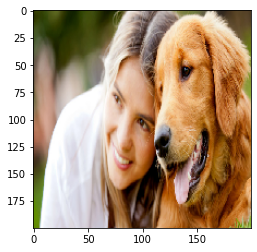

In [0]:
import matplotlib.pyplot as plt
img = image.load_img("Dog-and-Person.jpg",target_size=(200,200))
img = image.img_to_array(img)
plt.imshow(img.astype('int32'))
plt.show()

In [0]:
img

array([[[-79.939    ,  63.221    ,   9.32     ],
        [-73.939    ,  67.221    ,  13.32     ],
        [  2.060997 ,  30.221    ,  -4.6800003],
        ...,
        [-66.939    ,  80.221    ,  19.32     ],
        [-95.939    ,  75.221    ,  14.32     ],
        [-72.939    ,  99.221    ,  48.32     ]],

       [[-67.939    ,  59.221    ,  -0.6800003],
        [-22.939003 ,  73.221    ,  34.32     ],
        [-63.939003 , -20.779    , -50.68     ],
        ...,
        [-76.939    ,  66.221    ,   5.3199997],
        [-90.939    ,  58.221    ,  -0.6800003],
        [-52.939003 ,  74.221    ,  20.32     ]],

       [[-37.939003 ,  15.221001 , -32.68     ],
        [-20.939003 ,  21.221    , -18.68     ],
        [-22.939003 ,  58.221    ,  17.32     ],
        ...,
        [-51.939003 ,  71.221    ,  22.32     ],
        [ 16.060997 , 113.221    ,  77.32     ],
        [-52.939003 ,  32.221    , -16.68     ]],

       ...,

       [[ 32.060997 ,  29.221    ,  10.32     ],
        [ 3